# Linear regression 


We load the dataset 'diabetes' using the sklearn load function: 

In [11]:
# matplotlib inline
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

The dataset consists of data and targets. Target tells us what is the desired output for specific example from data: 

In [3]:
X = diabetes.data
y = diabetes.target
print(X.shape)
print(y.shape)

(442, 10)
(442,)


Splitting the data
==================
We want to split the data into train set and test set. We fit the linear model on the train set, and we show that it performs good on test set. 

Before splitting the data, we shuffle (mix) the examples, because for some datasets the examples are ordered. 

If we wouldn't shuffle, train set and test set could be totally different, thus linear model fitted on train set wouldn't be valid on test set.
Now we shuffle:


In [5]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=1)
print(X.shape)
print(y.shape)

(442, 10)
(442,)


Each example of data has 10 columns in total.

We want to work with 1-dim data because it is simple to visualize. Therefore select only one column, e.g column 2 and fit linear model on it:

In [6]:
# Use only one column from data
print(X.shape)
X = X[:, 2:3]
print(X.shape)

(442, 10)
(442, 1)


Split the data into training/testing sets

In [7]:
train_set_size = 250
X_train = X[:train_set_size]  # selects first 250 rows (examples) for train set
X_test = X[train_set_size:]   # selects from row 250 until the last one for test set
print(X_train.shape)
print(X_test.shape)

(250, 1)
(192, 1)


Split the targets into training/testing sets

In [8]:
y_train = y[:train_set_size]   # selects first 250 rows (targets) for train set
y_test = y[train_set_size:]    # selects from row 250 until the last one for test set
print(y_train.shape)
print(y_test.shape)

(250,)
(192,)


Now we can look at our train data. We can see that the examples have linear relation. 

Therefore, we can use linear model to make good classification of our examples.


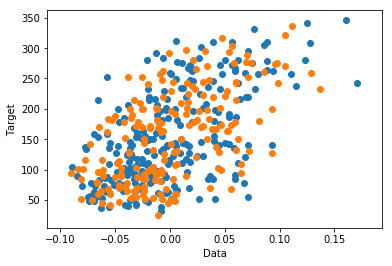

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlabel('Data')
plt.ylabel('Target');

Linear regression
=================
Create linear regression object, which we use later to apply linear regression on data

In [20]:
from sklearn import linear_model
import numpy as np
regr = linear_model.LinearRegression()

Fit the model using the training set

In [21]:
regr.fit(X_train, y_train);

We found the coefficients and the bias (the intercept)

In [22]:
print(regr.coef_)
print(regr.intercept_)

[988.07836941]
150.80798145969447


Now we calculate the mean square error on the test set

In [23]:
# The mean square error
print("Training error: ", np.mean((regr.predict(X_train) - y_train) ** 2))
print("Test     error: ", np.mean((regr.predict(X_test) - y_test) ** 2))


Training error:  3960.4058766864073
Test     error:  3811.1989929980004


Plotting data and linear model
==============================
Now we want to plot the train data and teachers (marked as dots). 

With line we represents the data and predictions (linear model that we found):


Text(0,0.5,'Target')

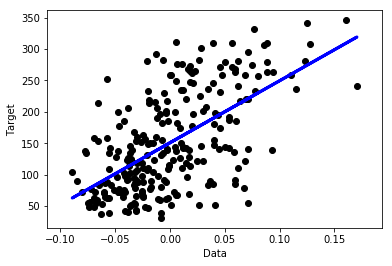

In [24]:
# Visualises dots, where each dot represent a data exaple and corresponding teacher
plt.scatter(X_train, y_train,  color='black')
# Plots the linear model
plt.plot(X_train, regr.predict(X_train), color='blue', linewidth=3);
plt.xlabel('Data')
plt.ylabel('Target')

We do similar with test data, and show that linear model is valid for a test set:

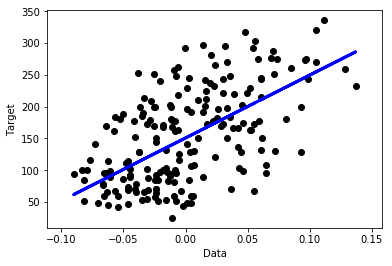

In [26]:
# Visualises dots, where each dot represent a data example and corresponding teacher
plt.scatter(X_test, y_test,  color='black')
# Plots the linear model
plt.plot(X_test, regr.predict(X_test), color='blue', linewidth=3);
plt.xlabel('Data')
plt.ylabel('Target');